In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import sklearn
import sys
import uuid

Print versions

In [2]:
print('The Python version is {}.\n'.format(sys.version))
print('The Numpy version is {}.\n'.format(np.__version__))
print('The Pandas version is {}.\n'.format(pd.__version__))
print('The Matplotlib version is {}.\n'.format(mpl.__version__))
print('The Scikit-Learn version is {}.\n'.format(sklearn.__version__))

The Python version is 3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)].

The Numpy version is 1.15.4.

The Pandas version is 0.23.4.

The Matplotlib version is 3.0.2.

The Scikit-Learn version is 0.20.2.



# Load data

The data set from the UCI Repository: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#

The data is based on credit defaults in Taiwan, which were apparently a big problem for their economy.

# Helpful links related to data set

Similar project in R:
https://rstudio-pubs-static.s3.amazonaws.com/281390_8a4ea1f1d23043479814ec4a38dbbfd9.html

Long and kind of boring notebook in python:
https://www.kaggle.com/lucabasa/credit-card-default-a-very-pedagogical-notebook/

Discussion of this dataset on Kaggle, including someone contacting the author about the incorrect data dictionary and getting a response:
https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/discussion

The published research based on this data set: https://bradzzz.gitbooks.io/ga-dsi-seattle/content/dsi/dsi_05_classification_databases/2.1-lesson/assets/datasets/DefaultCreditCardClients_yeh_2009.pdf

Use the keyword options as a teachable moment for the course.

In [3]:
df = pd.read_excel('../Data/default of credit card clients.xls', skiprows=[0])

In [4]:
df.shape

(30000, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

This is conveniently coded as numbers already.

Steve: we could transform categoricals to strings and them make the student convert to numbers. However this is extra work on the front end and I feel we're already pressed for time. Rather, we can have some discussion of the effects of what was done here already for us, and maybe practice One Hot Encoding on some dummy data.

Before proceeding to examine the features, what is the class fraction of the response variable?

In [6]:
df['default payment next month'].mean()

0.2212

Not too imbalanced; a lot of people were defaulting, compared to what I hear of similar data sets from the U.S., with a ~1% default rate.

In [7]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### IDs
How many unique IDs are there?

In [8]:
df['ID'].nunique()

30000

Are they simply 1 - 30000 ?

In [9]:
np.array_equal(df['ID'].values, range(1,30001))

True

Yes. Make a more realistic looking account ID, using python's UUID (Universally Unique Identifier) library.

In [11]:
test_id = uuid.uuid4()
test_id

UUID('43b8cdd3-f1e5-4feb-a7b1-cb1edc2b88b9')

In [12]:
str(test_id)[:13]

'43b8cdd3-f1e5'

That's probably enough.

In [15]:
anon_ids = [str(uuid.uuid4())[:13] for i in range(0,df.shape[0])]

In [16]:
anon_ids[0:10]

['fee1f329-20ad',
 '240071ea-e2fd',
 'bb469ded-acb4',
 'ee92abf8-ce91',
 '2df909f5-e478',
 '9288f160-233e',
 '3a73489b-c9ac',
 '127b0310-7ef1',
 '756bbdc0-efee',
 '926574c2-a923']

In [17]:
df_dirty = df.copy(deep=True)

In [18]:
df_dirty['ID'] = anon_ids

In [19]:
df_dirty.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,fee1f329-20ad,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,240071ea-e2fd,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,bb469ded-acb4,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,ee92abf8-ce91,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,2df909f5-e478,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Are they all unique?

In [22]:
print(df_dirty['ID'].nunique())
print(df_dirty['ID'].nunique() == df_dirty.shape[0])

30000
True


Yes.

How will we dirty up the data? I propose:
- Randomly replicate 1% of user IDs
- All features and response will be zero for these, making them invisible to a null count

Get the 1% of random data as a boolean index.

In [23]:
np.random.seed(seed=23)
random_bool = np.random.binomial(n=1, p=0.01, size=df.shape[0])

In [24]:
sum(random_bool)/len(random_bool)

0.0105

In [25]:
random_bool[0:5]

array([0, 0, 0, 0, 0])

Where are these?

In [26]:
random_indices = np.nonzero(random_bool)

In [27]:
random_indices[0][0:5]

array([141, 196, 323, 340, 398])

In [28]:
random_indices[0][-5:]

array([29470, 29490, 29646, 29685, 29875])

Not within the first or last 100. Good.

Get the IDs that will need to be replaced, look at first and last 5:

In [29]:
ids_to_dupe = df_dirty.loc[random_bool.astype(bool), 'ID'].values
ids_to_dupe[:5]

array(['d9bfdb41-0585', 'dc2bd810-190f', '25927231-c56c', '2cdd3f32-266a',
       'af55832b-6f53'], dtype=object)

In [30]:
ids_to_dupe[-5:]

array(['eaa29452-6422', 'a8f249fb-94b9', '09f924e6-3b07', '17ee0c1f-c19d',
       '1e6a1646-08d8'], dtype=object)

Place the duplicates 100 rows away to make them hard to spot by eye

In [31]:
df_dirty.loc[list(random_indices[0]+100), 'ID'] = ids_to_dupe

Check out the dupes in context

In [32]:
df_dirty.iloc[140:142,:]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
140,f6b6660e-fd88,240000,1,1,2,47,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
141,d9bfdb41-0585,180000,1,2,2,28,-1,-1,-1,-1,...,332,416,416,0,416,332,500,3500,832,0


In [33]:
df_dirty.iloc[240:242,:]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
240,08f070a3-cb1c,60000,2,1,2,28,1,2,2,-2,...,0,0,2285,0,0,0,0,2285,0,0
241,d9bfdb41-0585,50000,1,1,2,39,0,0,0,0,...,50803,30789,15874,1800,2000,3000,2000,2000,2000,0


Looks good. Make the rest of the columns zero for the dupes.

In [34]:
df_dirty.iloc[list(random_indices[0]+100), 1:] = 0

In [35]:
df_dirty.iloc[140:142,:]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
140,f6b6660e-fd88,240000,1,1,2,47,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
141,d9bfdb41-0585,180000,1,2,2,28,-1,-1,-1,-1,...,332,416,416,0,416,332,500,3500,832,0


In [36]:
df_dirty.iloc[240:242,:]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
240,08f070a3-cb1c,60000,2,1,2,28,1,2,2,-2,...,0,0,2285,0,0,0,0,2285,0,0
241,d9bfdb41-0585,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Okay, duplicate ID creation is complete.

In [37]:
df_dirty.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,fee1f329-20ad,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,240071ea-e2fd,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,bb469ded-acb4,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,ee92abf8-ce91,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,2df909f5-e478,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [38]:
df_dirty.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,011a8053-066f,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,c90c3947-af58,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,4eaa823d-ebbf,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,01402e61-4ff7,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,72e2ea36-8c9d,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


The duplicate rows are pretty well hidden.

### Suggested exercise:
Students will need to
- Be told that ID is account ID, so there shouldn't be two account IDs in our one month's worth of data
- Check the # of unique IDs and compare with # of rows to see that there's a problem

Then be walked through the solution:
- Find out how often the duplicated occur (no more than twice)
- See what the data looks like for duplicate IDs
    - for IDs that occur twice, one of the rows is filled with zeros
    - Look at one or two examples
    - Confirm programmatically that this is the case for each and every ID that occurs more than once
    - It's obvious here that these just need to be deleted
        - Say why
    - Do this


In [40]:
df_dirty['ID'].nunique()
#29687

29687

In [41]:
df_dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null object
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6              

### Data dictionary

Starting with the second column, 'LIMIT_BAL', and up through the demographics, here is the dictionary:

- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 

We are not allowed to use gender.

### Credit limit

"Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit."

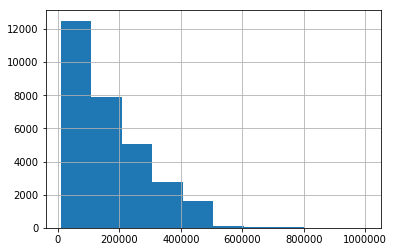

In [42]:
df['LIMIT_BAL'].hist()

Seems fine.

### Education
"Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)"

In [43]:
df['EDUCATION'].value_counts().sort_index()

0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

In [44]:
df.groupby('EDUCATION').agg({'default payment next month': 'mean'})

,default payment next month
EDUCATION,
0,0.000000
1,0.192348
2,0.237349
3,0.251576
4,0.056911
5,0.064286
6,0.156863


Looks like 0, 5 and 6 are unknown categories. It would probably be good to just lump these in with 4.

### Suggested exercise

The default rate for 0, 4, 5, and 6 are all lower than the norm. Since we don't know what 0, 5, or 6 are from the dictionary, it makes sense to lump them all with 4 (others). Do this here.

How many would be lumped?

In [46]:
# sum(df['EDUCATION'].isin([0, 5, 6]))
# 345

Lump them

In [47]:
# df.loc[df['EDUCATION'].isin([0, 5, 6]), ['EDUCATION']] = 4

Check distinct count again.

In [48]:
# df['EDUCATION'].value_counts().sort_index()
# 1    10585
# 2    14030
# 3     4917
# 4      468
# Name: EDUCATION, dtype: int64

And groupby mean with response variable:

In [49]:
# df.groupby('EDUCATION').agg({'default payment next month': 'mean'})
# 	default payment next month
# EDUCATION	
# 1	0.192348
# 2	0.237349
# 3	0.251576
# 4	0.070513

Also good to talk about with students: here they've already decided to encode education as an ordinal numerical feature. What are the effects of this? What are other possible ways?

### Marital status
"Marital status (1 = married; 2 = single; 3 = others)."

In [377]:
df['MARRIAGE'].value_counts().sort_index()

0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

In [378]:
df.groupby('MARRIAGE').agg({'default payment next month': 'mean'})

,default payment next month
MARRIAGE,
0,0.092593
1,0.234717
2,0.209283
3,0.260062


### Include in above exercise
Again, here we need to move 0 to the "other" category.

### Age

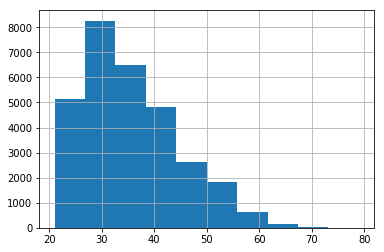

In [50]:
df['AGE'].hist()

Looks realistic.

# History of past payment

### From the publication, and data dictionary on UCI:

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:
- X6 = the repayment status in September, 2005;
- X7 = the repayment status in August, 2005;
- . . .;
- X11 = the repayment status in April, 2005.

The measurement scale for the repayment status is:
- -1 = pay duly;
- 1 = payment delay for one month;
- 2 = payment delay for two months;
- . . .;
- 8 = payment delay for eight months;
- 9 = payment delay for nine months and above. 

Steve: This is practically a numerical column except for the -1, which doesn't really make sense. We may want to replace it with 0, or transform it to a string `'On time'`?... Later learned that the data doesn't in fact follow this dictionary. And actually I think we should just leave as is. I feel we probably have enough to talk about and this would take extra time on the front end, to "undo" their encoding.

Note here, the first column looks like it should have been called, `'PAY_1'`. Do this now.

In [51]:
df.rename({"PAY_0": "PAY_1"}, axis='columns', inplace=True)

In [52]:
df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].head()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0


In [53]:
df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [54]:
df['PAY_1'].value_counts().sort_index()

-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: PAY_1, dtype: int64

What we see here is that there are undocumented values (-2, 0), and that they are quite prevalent. Someone on Kaggle emailed the author of the publication based on this dataset, who responded: https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/discussion/34608. The relevant part:

---

-2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

---

So, what do -2, -1, and 0 actually mean? Further down in that discussion, somebody with some experience from the financial industry weighs in. Their response mostly makes sense to me, although not entirely. I would wager to guess (also based somewhat on the link that person posted, as well as this link: https://www.experian.com/blogs/ask-experian/what-is-revolving-credit/):

- -2 means the person started that month with a zero balance, and never used any credit or made any payments
- -1 means they had a balance and paid it in full
- 0 means they had a balance and made at least the minimum payment, but didn't pay the whole balance

The reference to "revolving credit" is a little confusing. Based on some research, it seems like revolving credit is basically a credit card, where the available credit increases as you pay down the balance. Does this imply that only some accounts in this data set are credit cards, while others may be, for instance, personal loans?

This seems a little complicated. I think we ought to assume that all accounts are credit cards. A simple interpretation of category 0 here is that the person made at least the minimum payment, but still had some unpaid balance.

Now, based on some exploratory modeling below, it turns that the fraction of people who default is roughly the same for classes -2, -1, and 0. It might be simplest, for the purposes of communicating this data set in a training, to simply lump these together in to a single category, called "acount in good standing".

The other values, 1, 2, 3,... seem to indicate the number of months the account has not been in good standing (the account owner didn't make at least the minimum monthly payment).

# Amount of bill statement
X12-X17: Amount of bill statement (NT dollar).
- X12 = amount of bill statement in September, 2005;
- X13 = amount of bill statement in August, 2005;
- . . .;
- X17 = amount of bill statement in April, 2005. 

In [55]:
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131


In [56]:
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


# Amount of previous payment
X18-X23: Amount of previous payment (NT dollar).
- X18 = amount paid in September, 2005;
- X19 = amount paid in August, 2005;
- . . .;
- X23 = amount paid in April, 2005. 

In [57]:
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6']].head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0,689,0,0,0,0
1,0,1000,1000,1000,0,2000
2,1518,1500,1000,1000,1000,5000
3,2000,2019,1200,1100,1069,1000
4,2000,36681,10000,9000,689,679


In [58]:
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


# The target variable
In the publication, the author defines default as

"This research employed a binary variable – default payment (Yes = 1, No = 0), as the response variable"

There are no further details. However a reasonable definition would seem to be "doesn't make at least the minimum payment in the next month". It makes sense, then, that the historical payment predictors are the strongest, as confirmed by a correlation plot and the modeling below.

In [59]:
#Review class fraction of response variable
df['default payment next month'].mean()

0.2212

https://stackoverflow.com/questions/29432629/correlation-matrix-using-pandas

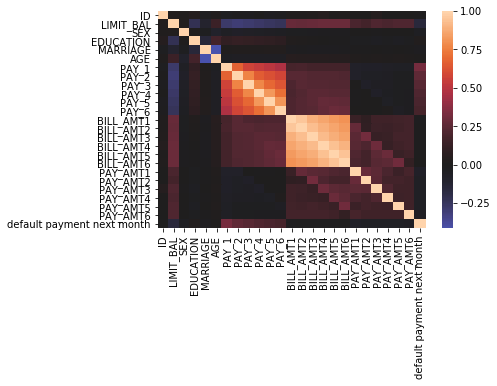

In [60]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0)

There is potentially a lot to talk about here. Seems like this would make a good entire section or exercise.

I'd start off by saying that we are looking at Pearson correlation, mathematically define it, give an intuition for what it is say that it's technically only valid when X and Y are normally distributed, however in practice it can provide a useful description in other cases. For example here our Y is either 0 or 1, so definitely not normally distributed (in this case a chi-2 test is more appropriate but is not built in to Pandas), and we haven't really looked to see about the features.

# Final "data dirtying" steps
Introduce nulls in to the most important feature, `'PAY_1'`. 5%? 10%?

These will be removed from the data set for the first several lessons, as we introduce the concepts of logistic regression and random forest. Then, towards the end, we will put them back in and discuss data imputation.

In [ ]:
#Steve is working on now

# Train test split

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
len(df.columns)

25

Define features

In [121]:
feature_cols = df.columns.values.tolist()

In [122]:
feature_cols

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

Everything but id, sex, and the target variable can be a feature:

In [123]:
not_features = ['ID', 'SEX', 'default payment next month']

In [124]:
for this_non_feature in not_features:
    feature_cols.remove(this_non_feature)

In [125]:
feature_cols

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

Make the train/test split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(
df.loc[:,feature_cols], df['default payment next month'],
test_size=0.2, random_state=24)

In [127]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24000, 22)
(24000,)
(6000, 22)
(6000,)


# Random forest model

In [128]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10,
                            min_samples_split=2, min_samples_leaf=1,
                            min_weight_fraction_leaf=0.0, max_features='sqrt',
                            max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, bootstrap=True,
                            oob_score=False, n_jobs=None, random_state=24,
                            verbose=0, warm_start=False, class_weight=None)

In [130]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=24, verbose=0, warm_start=False)

# Predict and assess goodness of fit

In [131]:
y_pred_proba = rf.predict_proba(X_test)

In [132]:
y_pred_proba.shape

(6000, 2)

Probability predictions for the positive class

In [133]:
y_pred_proba[:,1]

array([0.04121594, 0.66402059, 0.11128641, ..., 0.0577945 , 0.12257703,
       0.231684  ])

In [134]:
from sklearn import metrics

In [136]:
metrics.roc_auc_score(y_test, y_pred_proba[:,1])
# 0.7807771098115069 using features index 3 and above
# 0.7884719130120524 using all possible features (e.g. all but gender)
# 0.7897532295191326 same as above but lumping all unknown educ. levels to 4

0.7897532295191326

Results from the "undirtied" data, as benchmarks:
- 0.7807771098115069 using features index 3 and above
- 0.7884719130120524 using all possible features (e.g. all but gender)
- 0.7897532295191326 same as above but lumping all unknown educ. levels to 4

Removing 5% of the samples (which will be replaced by duplicate IDs with zero data that need to be removed)

What are the feature importances?

In [138]:
rf.feature_importances_

array([0.04075095, 0.00894963, 0.00543448, 0.02913291, 0.24640842,
       0.10969285, 0.0578179 , 0.05799299, 0.04621391, 0.02567312,
       0.03701926, 0.03206569, 0.02986109, 0.02859327, 0.02754337,
       0.02899236, 0.03824199, 0.03781715, 0.03035957, 0.02753485,
       0.02650346, 0.0274008 ])

In [139]:
feat_sort_ix = np.argsort(rf.feature_importances_)

In [140]:
feat_sort_ix = np.flipud(feat_sort_ix)

In [141]:
feat_sort_ix

array([ 4,  5,  7,  6,  8,  0, 16, 17, 10, 11, 18, 12,  3, 15, 13, 14, 19,
       21, 20,  9,  1,  2])

In [142]:
for this_ix in feat_sort_ix:
    print(feature_cols[this_ix], rf.feature_importances_[this_ix])

PAY_1 0.24640841579763328
PAY_2 0.10969285407602153
PAY_4 0.057992989269098016
PAY_3 0.057817899737334894
PAY_5 0.04621390527378284
LIMIT_BAL 0.04075095403883345
PAY_AMT1 0.038241992517122625
PAY_AMT2 0.037817150551149446
BILL_AMT1 0.037019256397458414
BILL_AMT2 0.03206568783194596
PAY_AMT3 0.03035956589895785
BILL_AMT3 0.02986109144547103
AGE 0.029132905094758233
BILL_AMT6 0.028992355607192932
BILL_AMT4 0.028593265476072056
BILL_AMT5 0.027543374659727577
PAY_AMT4 0.027534846436935725
PAY_AMT6 0.027400804590823433
PAY_AMT5 0.02650345618064067
PAY_6 0.025673119766301794
EDUCATION 0.008949631232246746
MARRIAGE 0.005434478120491483


So, the most important predictor is related to whether or not someone has paid their bill on time last month, or how many months it's been since they paid on time. Then the most recent months, in order, with the same data, are the next few most important predictors. It looks like these make up about half of the total feature importance.

### Possible way to make an interesting data quality problem
Since `'PAY_1'` is decidedly the  most important feature, this would be the one where missing values would have the largest effect. An interesting approach to this might be to introduce some missing values here, and then have a "problem within a problem" where we use another model, perhaps random forest, to predict the missing value based on the rest of the features.

In [144]:
df['PAY_1'].value_counts().sort_index()

-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: PAY_1, dtype: int64

In [145]:
df['PAY_2'].value_counts().sort_index()

-2     3782
-1     6050
 0    15730
 1       28
 2     3927
 3      326
 4       99
 5       25
 6       12
 7       20
 8        1
Name: PAY_2, dtype: int64

First realized this here: So, this is strange. The data dictionary indicates this is supposed to include values of -1, and then 1 through 9. Instead, there is -2, -1, and then 0 through 8.

What does this mean? Let's look at the relationship between the most important predictors, and the response

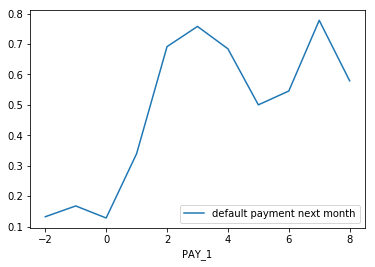

In [146]:
df.groupby('PAY_1').agg({'default payment next month': 'mean'}).plot()

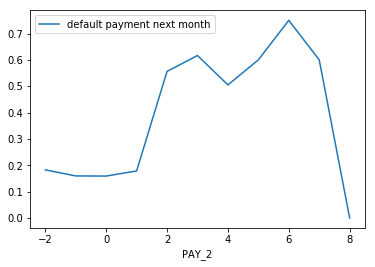

In [147]:
df.groupby('PAY_2').agg({'default payment next month': 'mean'}).plot()

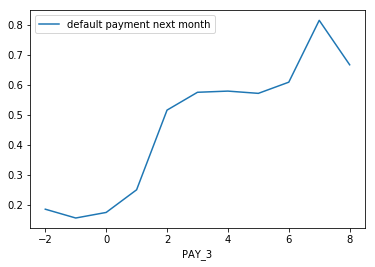

In [148]:
df.groupby('PAY_3').agg({'default payment next month': 'mean'}).plot()

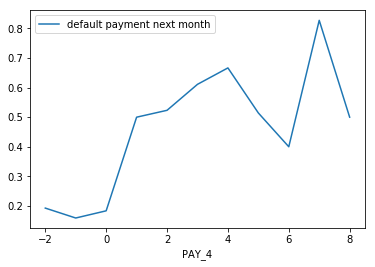

In [149]:
df.groupby('PAY_4').agg({'default payment next month': 'mean'}).plot()

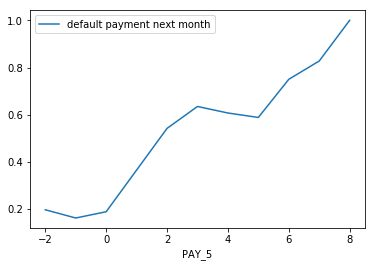

In [150]:
df.groupby('PAY_5').agg({'default payment next month': 'mean'}).plot()

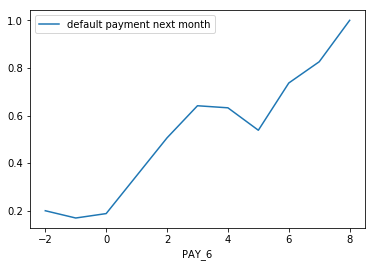

In [151]:
df.groupby('PAY_6').agg({'default payment next month': 'mean'}).plot()

It seems good to create missingness in the most important features, so that different imputation strategies could be attempted that would have a noticable impact on goodness of fit.

The `'PAY_X'` columns seem like the obvious candidates for this. We could make just the previous month `'PAY_1'` to have some missingness. This is reasonable, as since it's the most recent month, maybe for some reason a few people's data hadn't updated yet for some reason.

I wonder how this would affect things, if for example the filling strategy was

1. Very simple: fill with median or mode
2. More representative of the fact that the data is missing: I believe np.inf or maybe even np.nan can be directly used as numerical predicators in SKLearn random forest (confirm)
3. More sophisticated: use the existing columns to predict the missing values. `'PAY_2'`, etc look like they would be good predictors of `'PAY_1'`:


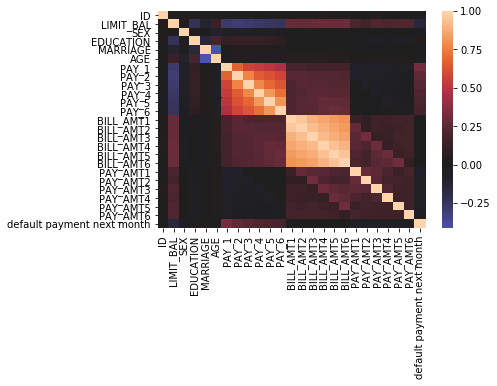

In [167]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0)

Additional points, for the last chapter, about looking ahead to monitoring the model in production:

- Look at the distribution of predicted probabilities of default. How does it compare with the training and testing data?
    - Can preview this by comparing training and testing data
- Consider the consequences of blindly applying an imputation strategy to data that is missing in scoring, that was never missing in training or testing

# Logistic regression

In [153]:
from sklearn.linear_model import LogisticRegression

In [162]:
lr = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1e6,
                        fit_intercept=True, intercept_scaling=1, class_weight='balanced',
                        random_state=24, solver='liblinear', max_iter=100,
                        multi_class='auto', verbose=0, warm_start=False, n_jobs=None)

In [163]:
lr.fit(X_train, y_train)

LogisticRegression(C=1000000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='auto', n_jobs=None, penalty='l2', random_state=24,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [164]:
y_lr_pred_proba = lr.predict_proba(X_test)

In [166]:
metrics.roc_auc_score(y_test, y_lr_pred_proba[:,1])

0.7017195797637381

Results with columns [3:-1] as features, L2 reg, C = 
- 1e6: 0.7170399065097639
- 100000: 0.7154806778010367
- 10000: 0.7169929264916672
- 1000: 0.7178201557292371
- 100: 0.7170353037377208
- 10: 0.7179298286768888
- 1: 0.7179541122673239
- 0.1: 0.7170626029374256
- 0.01: 0.7183140807843631
- 0.001: 0.7180752127869452
- 0.0001: 0.7093162963048787

1e6 with lumped education and all possible features except gender: 0.7017195797637381

Interesting, lumping education has a noticable effect on logistic regression (probably it was this and not the using of all possible features, but who knows).